#Locally adaptive Bayesian covariance regression:
## Algorithm test

Here, we follow the algorithm given in [Durante, Scarpa, and Dunson (2014)](https://www.researchgate.net/profile/David_Dunson/publication/232063211_Locally_adaptive_factor_processes_for_multivariate_time_series/links/09e4150df41e8d582a000000.pdf). In particular, we are following Appendix A.2.

In [1]:
using NGPtools
# set random seed
srand(12345);

# Load data

In [2]:
using HDF5

fid = h5open("data/labcr_test_data.jld", "r")

vars_to_read = [:y, :theta, :xi, :psi, :Σ0, :tobs]

for v in vars_to_read
    expr = :($v = read(fid[$("/$v")]))
    eval(expr)
end
close(fid)

In [3]:
using PyPlot
plt.style[:use]("ggplot")

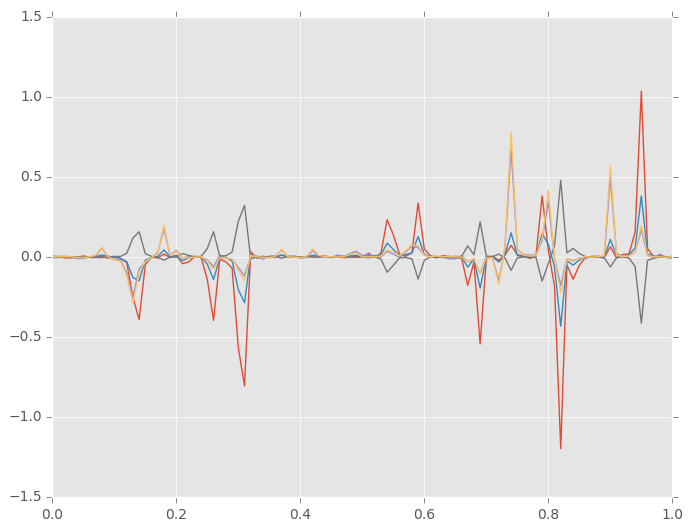

In [4]:
plot(tobs, y');

In [5]:
Np, Nt = size(y)
δ = diff(tobs)[1]

0.01

# Set up some parameters

In [6]:
NK = 2
NL = 2
Nst = NK * NL
Nm = 3 * Nst

12

# Define sampling functions

## Sample multivariable nGP: $\Xi$

Here, the state space model is given by 

$$\begin{align}
    y_t &= Z_t \Xi + \epsilon_t \\
    \Xi &= \mathrm{vec}[(\xi_{lk})] \\
    Z_t &= [\Psi(t)^\top \otimes \Theta, 0_{p \times 2KL}] \\ 
    \epsilon_t &\sim \mathcal{N}(0, \Sigma_0) \\
    \Xi_{t + 1} &= T_t \Xi_t + R_t \Omega_t
\end{align}$$

With $\Psi$ a column vector $(K, 1)$ of means for the process, the sequences of state dynamics matrices $T_t$ and $R_t$ given by the Zhu and Dunson approximate formulae, and $\mathrm{vec}$ the concatenation by columns operator.

In [7]:
# sampling will assume we have some variables, so let's make them
Ψ = rand(NK, 1, Nt)
Θ = rand(Np, NL)
σξ = 10.
σA = 0.5
σμ = 0.1
σα = 0.1

0.1

In [8]:
# now these are needed for the state space model
H = Σ0
Z = zeros(Float64, Np, Nm, Nt)

for t in 1:Nt
    Z[:, 1:Nst, t] = kron(Ψ[:, :, t]', Θ)
end

In [9]:
samp = sample(y, 1, Z, H, δ, σξ, σA, σμ, σα; approx=true)

12x101x1 Array{Float64,3}:
[:, :, 1] =
  0.205303     0.207762     0.21742     …  -1.87219   -1.90216   -1.92263 
 -0.278765     0.557057     0.61568        -1.06347   -1.96078   -1.6685  
 -0.527616    -1.85576     -2.03264        -0.87801   -1.60292   -1.40069 
 -0.0720587   -0.0695614   -0.0673126       0.484256   0.492741   0.500832
  0.246632     0.966683     0.188317       -2.9942    -2.044     -1.51966 
  0.423586    -0.352245    -0.595163    …  -5.99352   -6.7144    -5.35171 
 -0.00112126  -0.00364033  -0.00608677     -0.328339  -0.333296  -0.339128
  0.249769     0.224759     0.219874        0.844693   0.805532   0.774972
 -0.150827    -0.187305    -0.240349       -0.584904  -0.511042  -0.472988
  0.260603     0.260603     0.260603        0.260603   0.260603   0.260603
 -0.251907    -0.244643    -0.287499    …  -0.495653  -0.583208  -0.584509
 -0.00855602   0.0236562    0.0221057       0.774912   0.715494   0.697737

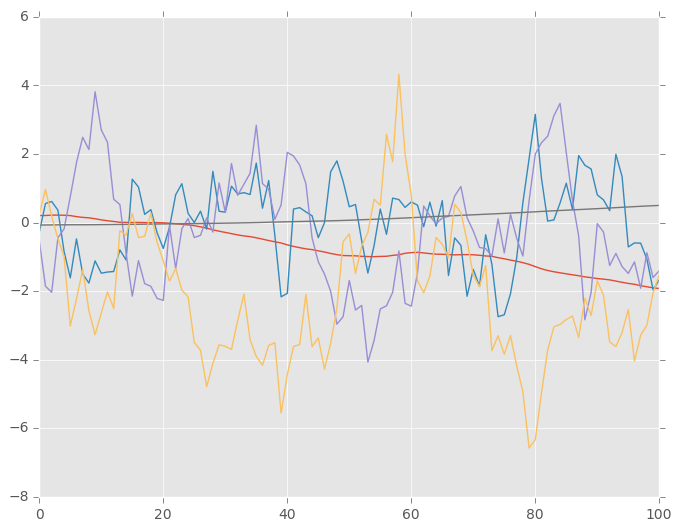

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ff36310>
 PyObject <matplotlib.lines.Line2D object at 0x31ff36590>
 PyObject <matplotlib.lines.Line2D object at 0x31ff367d0>
 PyObject <matplotlib.lines.Line2D object at 0x31ff36990>
 PyObject <matplotlib.lines.Line2D object at 0x31ff36b50>

In [10]:
plot(samp[1:Np, :, 1]')